## Indice contenuti
- [Ensemble Learning](#Ensemble-Learning)
- [Descrizione dataset](#Descrizione-dataset)
- [Analisi esplorativa del dataset](#Analisi-esplorativa-del-dataset)
    - [Caricamento in memoria del dataset](#Caricamento-in-memoria-del-dataset)
    - [Pre-processing del dataset](#Pre-processing-del-dataset)
- [Algoritmi Bagging](#Algoritmi-Bagging)
    - [Bagged Decision Trees](#Bagged-Decision-Trees)
    - [Random Forest](#Random-Forest)
    - [Extra Trees](#Extra-Trees)
- [Algoritmi Boosting](#Algoritmi-Boosting)
    - [AdaBoost](#AdaBoost)
    - [Stochastic Gradient Boosting](#Stochastic-Gradient-Boosting)
- [Voting Ensemble](#Voting-Ensemble)
<hr>

### Ensemble Learning
L'Ensemble Learning è una metodologia strategica per migliorare le performance del modello addestrato. Di solito conviene applicare l'Ensemble Learning considerando differenti modelli che potrebbero essere costruiti per il dataset in analisi.

L'Ensemble Learning è, pertanto, utilizzato al fine di combinare insieme diversi insiemi di learners (detti individual models) e le rispettive predizioni al fine di poter avere un unico risultato.

L'errore che emerge da qualsiasi modello può essere scomposto matematicamente in tre componenti.

$\text{Err}(x) = \text{Bias}^2 + \text{Varianza} + \text{Errore irriducibile}$

La spiegazione di ciascuna componente è di seguito riportata:
- <b>Bias</b>: quantifica in media quanto i valori attesi siano diversi dal valore effettivo
- <b>Varianza</b>: indica in che modo le previsioni effettuate sulla stessa osservazione siano differenti l'una dall'altra

Naturalmente, incrementando la complessità del tuo modello, si assisterà ad una riduzione dell'errore dovuta alla prsenza di un minore bias nel modello. Tuttavia, questo accade solo fino ad un certo punto. Man mano che, infatti, si tende a rendere il modello sempre più complesso, tale si adatterà eccessivamente iniziando a soffrire di varianza elevata.

Un modello ideale, pertanto, dovrebbe mantenere un equilibrio tra questi due tipi di errori. Tale problema passa sotto il nome di "trade-off di Bias e Varianza". L'Ensemble Learning risulta utile in questo frangente per poter ottenere il giusto compromesso.

I tre principali metodi per combinare le predizioni derivanti da differenti modelli sono riportati di seguito:

- <b>Bagging</b>: Bagging cerca di implementare learners simili tra loro su un piccolo campione della popolazione e prende una media di tutte le previsioni. Nel Bagging generalizzato, è possibile usare differenti learners su popolazioni diverse al fine di ridurre la varianza.

![Esempio di Bagging](https://www.analyticsvidhya.com/wp-content/uploads/2015/07/bagging.png)
- <b>Boosting</b>: Boosting è una tecnica iterativa che regola il peso di un'osservazione in base all'ultima classificazione effettuata. Se un'osservazione è stata classificata in modo errato, si cerca di aumentare il peso di questa osservazione e viceversa. La tecnica Boosting, in generale, riduce il bias e crea modelli predittivi solidi. Tuttavia, a volte possono adattarsi eccessivamente ai dati di training, andando in overfitting.

![Esempio di Boosting](https://www.analyticsvidhya.com/wp-content/uploads/2015/07/boosting.png)
- <b>Voting</b>: La tecnica per votazione è una delle tecniche di apprendimento Ensemble più dirette in cui vengono combinate le previsioni ottenute da più modelli. Il metodo inizia con la creazione di due o più modelli separati con lo stesso set di dati. In seguito, un modello Ensemble basato sul voto può essere utilizzato per racchiudere i modelli precedenti e aggregare le previsioni di tali modelli. Dopo che il modello Ensemble basato sul voto è stato costruito, può essere utilizzato per fare una previsione sui nuovi dati. Alle previsioni fatte dai sottomodelli possono essere assegnati pesi. L'aggregazione utilizzando lo Stack è una tecnica che può essere utilizzata per imparare a valutare queste previsioni nel miglior modo possibile.

![Esempio di Voting](https://www.analyticsvidhya.com/wp-content/uploads/2015/07/stacking-297x300.png)

## Descrizione dataset

Per costruire i differenti modelli, verrà utilizzato il dataset <a href="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv">Pima Indians</a> riguardante informazioni circa il diabete. Il dataset raccoglie informazioni in forma numerica per la risoluzione di un problema di classificazione binaria.

Di seguito sono riportate le features presenti:
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
   
Per ciascun algoritmo di tipo Ensemble, si utilizzerà al fine della valutazione sui dati non visti una 10-Fold Cross Validation.

## Analisi esplorativa del dataset

### Caricamento in memoria del dataset
Con il seguente comando si effettua il caricamento in memoria di quanto contenuto nel dataset _'pima-indians-diabetes.csv'_.

Per condurre una prima fase di analisi esplorativa e comprendere la natura dei dati a disposizione, si stampano di seguito i primi cinque esempi presenti nel dataset:

In [1]:
import pandas
import matplotlib.pyplot as plt

col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv("./input/pima-indians-diabetes.csv", names=col_names)
array = dataframe.values

dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Pre-processing del dataset

Per ottenere informazioni statistiche inerenti ciascuna feature a disposizione, mediante il metodo _describe()_ si è provveduto al calcolo delle seguenti informazioni:
- <b>count</b>: conteggio del numero di esempi per la feature selezionata
- <b>mean</b>: media aritmetica per la feature selezionata
- <b>std</b>: deviazione standard per la feature selezionata
- <b>min</b>: valore minimo presentato dagli esempi per la feature selezionata
- <b>25%</b>: primo quartile calcolato sugli esempi per la feature selezionata
- <b>50%</b>: secondo quartile calcolato sugli esempi per la feature selezionata
- <b>75%</b>: terzo quartile calcolato sugli esempi per la feature selezionata
- <b>max</b>: valore massimo presentato dagli esempi per la feature selezionata

In [2]:
dataframe.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Al fine di ottenere una descrizione complessiva del Dataframe (e dunque del relativo dataset) caricato, mediante il metodo _info()_ si sono ottenute le seguenti informazioni:
- <b>#</b>: numero di feature presente nel DataFrame
- <b>Column</b>: intestazione delle features nel DataFrame
- <b>Non-Null Count</b>: contatore di valori non nulli per ogni feature presente nel DataFrame
- <b>Dtype</b>: tipo di dato memorizzato per ogni feature presente nel DataFrame

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Split del dataset in X e Y
X = array[:,0:8] #Esclude la colonna relativa alla classe
Y = array[:,8] #Considera esclusivamente la classe come feature target

#Impostazione del seed
seed = 1

Vista la presenza di dati espressi su un diverso range numerico, si effettua la standardizzazione, mediante apposito metodo StandardScaler().

In [5]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [6]:
num_trees_list = [x for x in range(5,100+1,5)]

In [7]:
def print_graph(num_trees_list, means):
    plt.plot(num_trees_list, means)
    plt.xlabel('Numero alberi')
    plt.ylabel('Media Cross-Validation')
    plt.show()

In [8]:
def print_max_accuracy(num_trees_list, means):
    max_index = means.index(max(means))
    zipped_list = list(zip(num_trees_list, means))
    print(f"Numero alberi: {zipped_list[max_index][0]} -> Accuracy CV: {zipped_list[max_index][1]}")

# Algoritmi Bagging
1. Bagged Decision Trees
2. Random Forest
3. Extra Trees

## Bagged Decision Trees
L'algoritmo Bagging registra le migliori performance quando applicato su dataset con un'alta varianza. Un classico esempio è rappresentato dai DecisionTrees, spesso costruiti senza alcuna potatura.

Negli snippet di codice sottostanti, è mostrato l'utilizzo di _BaggingClassifier_ costruito con _DecisionTreeClassifier_. 
Si valuterà il _BaggingClassifier_ utilizzando un numero variabile di alberi. Infine, si stamperà il plot dell'accuratezza ritornata dalla Cross-Validation e il rispettivo numero di alberi. Tra tali valori, inoltre, è ritornato il numero di alberi consigliati in base al valore dell'accuratezza restituita dalla Cross-Validation.


Parametri utilizzat in BaggingClassifier:
- <b>base_estimator</b>: lo stimatore base da fittare su un subset random del dataset. Se non importato, lo stimatore è un albero di decisione
- <b>n_estimators</b>: numero di stimatori nell'ensemble
- <b>random_state</b>: utilizzato per controllare il resampling randomico del dataset originale. Se lo stimatore base acetta questo attrivuto, nell'ensemble viene generato un seme differente per ogni istanza.
- <b>max_samples</b>: numero di esempi da prendere in considerazione da X per il train di ogni stimatore.
- <b>max_features</b>: numero di features da considerare per ogni stimatore base
- <b>bootstrap</b>: vero se gli esempi sono prelevati con rimessa.
- <b>bootstrap_features</b>: vero se le features sono prelevate con rimessa.
- <b>n_jobs</b>: numero di processi da eseguire in parallelo per il fit e il predict.

In [9]:
# Bagged Decision Trees for Classification
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

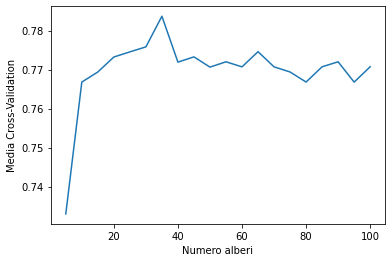

Numero alberi: 35 -> Accuracy CV: 0.783697881066302


In [10]:
#Dichiarazione del modello
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)

#Classificatore di base
#criterion='gini' restituisce un numero di alberi pari a 80, con la stessa accuracy
cart = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)

means = []
for num_trees in num_trees_list:
    #Dichiarazione del modello Bagging
    model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1)
    results = model_selection.cross_val_score(model, X, Y, cv=kfold)
    means.append(results.mean())
    
print_graph(num_trees_list, means)
print_max_accuracy(num_trees_list, means)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

cart = cart.fit(X_train, y_train)
y_train_pred = cart.predict(X_train)
y_test_pred = cart.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

model = model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model_train = accuracy_score(y_train, y_train_pred) 
model_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f' % (model_train, model_test))

Decision tree train/test accuracies 1.000/0.675
Bagging train/test accuracies 1.000/0.740


## Random Forest

Random Forest è una estensione del Bagged Decision Trees, visto precedentemente. In questo caso, i campioni del training set sono presi con rimpiazzamento, ma gli alberi sono costruiti in modo tale che sia ridotta la correlazione tra i singoli classificatori.

Negli snippet di codice sottostanti, è mostrato l'utilizzo di _RandomForestClassifier_ con un punto di split scelto dalla selezione randomica di tre features. 
Si valuterà il _RandomForestClassifier_ utilizzando un numero variabile di alberi. Infine, si stamperà il plot dell'accuratezza ritornata dalla Cross-Validation e il rispettivo numero di alberi. Tra tali valori, inoltre, è ritornato il numero di alberi consigliati in base al valore dell'accuratezza restituita dalla Cross-Validation.


Parametri utilizzati in RandomForestClassifier:
- <b>n_estimators</b>: numero di alberi decisionali da utilizzare
- <b>max_features</b>: numero di feature massimo da utilizzare
- <b>n_jobs</b>: numero di processi da utilizzare per il fit e la predict

In [12]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

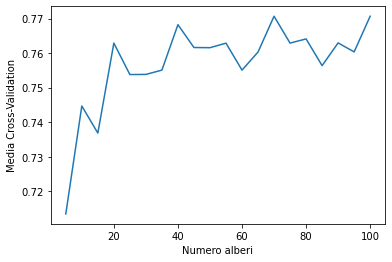

Numero alberi: 100 -> Accuracy CV: 0.7706766917293234


In [13]:
#Dichiarazione del modello
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)

#Dichiarazione del modello RandomForestClassifier
means = []
for num_trees in num_trees_list:
    model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, n_jobs=-1)
    results = model_selection.cross_val_score(model, X, Y, cv=kfold)
    means.append(results.mean())
    
print_graph(num_trees_list, means)
print_max_accuracy(num_trees_list, means)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

model = model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model_train = accuracy_score(y_train, y_train_pred) 
model_test = accuracy_score(y_test, y_test_pred) 
print('RandomForestClassifier train/test accuracies %.3f/%.3f' % (model_train, model_test))

RandomForestClassifier train/test accuracies 1.000/0.734


### Extra Trees
Extra Trees sono una ulteriore modifica al Bagging, visto precedentemente, dove vengono costruiti degli alberi randomici dai campioni presenti all'interno del training set.

Negli snippet di codice sottostanti, è mostrato l'utilizzo di _ExtraTreesClassifier_ con un punto di split scelto dalla selezione randomica di sette features. 
Si valuterà il _ExtraTreesClassifier_ utilizzando un numero variabile di alberi. Infine, si stamperà il plot dell'accuratezza ritornata dalla Cross-Validation e il rispettivo numero di alberi. Tra tali valori, inoltre, è ritornato il numero di alberi consigliati in base al valore dell'accuratezza restituita dalla Cross-Validation.


Parametri utilizzati in ExtraTreesClassifier:
- <b>n_estimators</b>: numero di stimatori base da utilizzare
- <b>max_features</b>: numero massimo di features da utilizzare
- <b>random_state</b>: : utilizzato per controllare il resampling randomico del dataset originale. Se lo stimatore base acetta questo attrivuto, nell'ensemble viene generato un seme differente per ogni istanza.
- <b>n_jobs</b>: numero di processi da utilizzare per il fit e la predizione

In [15]:
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier

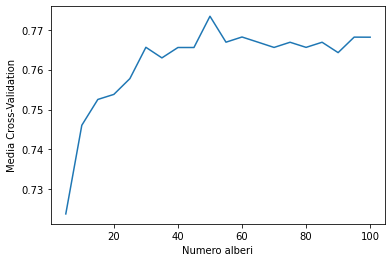

Numero alberi: 50 -> Accuracy CV: 0.7733595352016405


In [16]:
#Definizione parametri del modello
num_trees = 100
max_features = 7

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)

#Dichiarazione del modello ExtraTreesClassifier
means = []
for num_trees in num_trees_list:
    model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features, n_jobs = -1, random_state=seed)
    results = model_selection.cross_val_score(model, X, Y, cv=kfold)
    means.append(results.mean())
    
print_graph(num_trees_list, means)
print_max_accuracy(num_trees_list, means)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

model = model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model_train = accuracy_score(y_train, y_train_pred) 
model_test = accuracy_score(y_test, y_test_pred) 
print('ExtraTreesClassifier train/test accuracies %.3f/%.3f' % (model_train, model_test))

ExtraTreesClassifier train/test accuracies 1.000/0.714


# Algoritmi Boosting

Gli algoritmi Ensembel di Boosting creano una sequenza di modelli che permettono si correggere gli errori fatti dai modelli precedenti presenti nella sequenza. Una volta creati, i modelli effettuano le predizioni, le quali possono essere pesate dalla rispettiva accuracy del modello e i risultati sono combinati al fine di ottenere una predizione complessiva finale.

I due algoritmi principali di Boosting Ensemble sono classificabili in:
1. AdaBoost
2. Stochastic Gradient Boosting

## AdaBoost
AdaBoost pesa le istanze presenti nel dataset in base alla difficoltà/facilità di classificazione, permettendo all'algoritmo di porre più o meno attenzione a tali esempi nella costruzione dei modelli seguenti.


Negli snippet di codice sottostanti, è mostrato l'utilizzo di _AdaBoostClassifier_
Si valuterà il _AdaBoostClassifier_ utilizzando un numero variabile di alberi. Infine, si stamperà il plot dell'accuratezza ritornata dalla Cross-Validation e il rispettivo numero di alberi. Tra tali valori, inoltre, è ritornato il numero di alberi consigliati in base al valore dell'accuratezza restituita dalla Cross-Validation.

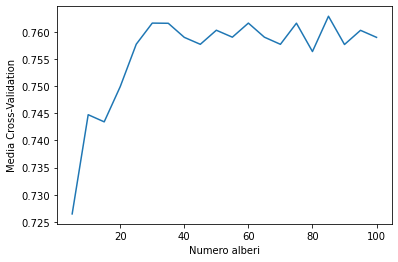

Numero alberi: 85 -> Accuracy CV: 0.7629186602870812


In [18]:
# AdaBoost Classification
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)
#Classificatore di base
#tree = DecisionTreeClassifier(criterion='entropy', max_depth=1,random_state=1)

#Dichiarazione del modello AdaBoost
means = []
for num_trees in num_trees_list:
    #Opzionalmente si potrebbe parametrizzare con il classificatore di base l'attributo base_estimator
    #model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed, learning_rate=0.1, base_estimator=tree)
    model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed, learning_rate=0.1)

    results = model_selection.cross_val_score(model, X, Y, cv=kfold)
    means.append(results.mean())
    
print_graph(num_trees_list, means)
print_max_accuracy(num_trees_list, means)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

#Se base_estimator è definito, è possibile rimuovere il commento
"""tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))"""

model = model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model_train = accuracy_score(y_train, y_train_pred) 
model_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f' % (model_train, model_test))

AdaBoost train/test accuracies 0.798/0.714


## Stochastic Gradient Boosting
Stochastic Gradient Boosting (conosciuto anche come Gradient Boosting Machines) fa riferimento ad una delle tecniche più sofisticate tra le tecniche di Ensemble Learning, basate sul metodo di ottimizzazione che tiene conto della discesa del gradiente stocastica.

Negli snippet di codice sottostanti, è mostrato l'utilizzo di _GradientBoostingClassifier_.
Si valuterà il _GradientBoostingClassifier_ utilizzando un numero variabile di alberi. Infine, si stamperà il plot dell'accuratezza ritornata dalla Cross-Validation e il rispettivo numero di alberi. Tra tali valori, inoltre, è ritornato il numero di alberi consigliati in base al valore dell'accuratezza restituita dalla Cross-Validation.


Anche in questo caso, i parametri utilizzati in GradientBoostingClassifier sono i seguenti:
- <b>n_estimators</b>: numero di alberi da utilizzare
- <b>random_state</b>: : utilizzato per controllare il resampling randomico del dataset originale. Se lo stimatore base acetta questo attrivuto, nell'ensemble viene generato un seme differente per ogni istanza.

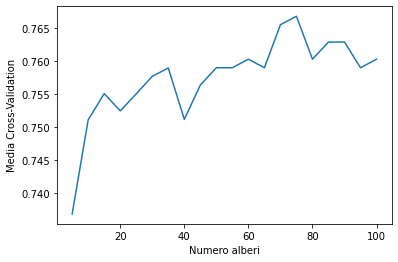

Numero alberi: 75 -> Accuracy CV: 0.7667976760082024


In [20]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)

#Dichiarazione del modello GradientBoostingClassifier
means = []
for num_trees in num_trees_list:
    model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
    results = model_selection.cross_val_score(model, X, Y, cv=kfold)
    means.append(results.mean())
    
print_graph(num_trees_list, means)
print_max_accuracy(num_trees_list, means)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

model = model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

model_train = accuracy_score(y_train, y_train_pred) 
model_test = accuracy_score(y_test, y_test_pred) 
print('GradientBoostingClassifier train/test accuracies %.3f/%.3f' % (model_train, model_test))

GradientBoostingClassifier train/test accuracies 0.902/0.753


# Voting Ensemble

L'ultima famiglia di Ensemble considerata permette, mediante votazioni, di combinare le predizioni derivanti da diversi algoritmi di apprendimento automatico.

Il funzionamento si asa sulla creazione di due o più modelli standalone rispetto ai dati presenti nel training set. Successivamente, un VotingClassifier può essere utilizzato per unire i modelli e mediare circa le predizioni fatte dai due sotto-modelli sui nuovi dati presenti nel test-set.

Le predizioni fatte dai sotto-modelli possono essere pesate, ma tale compito risulta essere arduo. Tale tecnica è chiamata Stacked Generalization e non è attualmente implementata in scikit-learn.

Negli snippet di codice sottostanti, è mostrato l'utilizzo di VotingClassifier. In particolare, VotingClassifier si baserà sulle predizioni derivanti da LogisticRegression, DecisionTreeClassifier e Support Vector Machine, mediando i risultati ottenuti mediante Cross-Validation.

In [22]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle = True)

# Creazione dei singoli algoritmi
sub_models = []
lr = LogisticRegression(max_iter=1000)
sub_models.append(('Logistic Regression', lr))

cart = DecisionTreeClassifier()
sub_models.append(('Decision Tree (CART)', cart))

svc = SVC()
sub_models.append(('Support Vector Machine', svc))

# Creazione dell'Ensemble
ensemble = VotingClassifier(sub_models, voting='hard')
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)
print("Accuracy: ", results.mean())

Accuracy:  0.7707792207792208


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

ensemble = ensemble.fit(X_train, y_train)
y_train_pred = ensemble.predict(X_train)
y_test_pred = ensemble.predict(X_test)

model_train = accuracy_score(y_train, y_train_pred) 
model_test = accuracy_score(y_test, y_test_pred) 
print('VotingClassifiler train/test accuracies %.3f/%.3f' % (model_train, model_test))

VotingClassifiler train/test accuracies 0.858/0.753
